In [2]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

# from stable_baselines3.sac.policies import MlpPolicy
# from stable_baselines3.common.vec_env import DummyVecEnv
# from stable_baselines3 import SAC
import logging
import gym
import numpy as np
import os
import matplotlib.pyplot as plt
import DyMat
import modelicagym

In [2]:
import ray

In [ ]:
env_name = "MicrogridEnv-v2" 

# create the environment. this will run an initial step and must return [True, [...]] or something is broken
# TODO: create error handling/warnings if simulations don't work (i.e. returns [False], [...])
env = gym.make(env_name)

In [ ]:
model = SAC(MlpPolicy, env, learning_rate=10**-5, ent_coef='auto_0.1', verbose=1, tensorboard_log='tensorboard_log', batch_size=64)

env.reset()
for _ in range(10):
    model.learn(1000, reset_num_timesteps=False)
    

In [ ]:
env.dymola.close()

In [ ]:
model_name= 'test'
model.save(model_name)

In [ ]:
for _ in range(2):
    env.step(env.default_action)

In [ ]:
env.dymola.getLastError()

In [ ]:
x = np.divide(env.debug_data["my_time"],3600)
leg = ["stadium.P","macky.P", "hellums.P","umc.P", "chw_plant.P","ec.P", "kitt.P","quad.P"]

for l in leg:
    plt.plot(x,np.multiply(env.debug_data[l],100))
plt.xlim(0,48)

plt.ylabel("P_cons (MW)")
plt.xlabel('Time (Hours)')
#plt.plot(x,env.debug_data['irradiance_to_Power.irradiance_out'])

In [ ]:
x = np.divide(env.debug_data["my_time"],3600)
leg = ["stadium.v", "GRID.V", "macky.v", "hellums.v", "umc.v", "quad.v", "chw_plant.v", "ec.v", "kitt.v", "CENTRAL_bus.V"]

for l in leg:
    plt.plot(x,env.debug_data[l])
plt.xlim(0,48)

plt.ylabel("Voltage (p.u)")
plt.xlabel('Time (Hours)')
plt.ylim(0.94,1.06)
# plt.ylim(0.995,0.996)

In [4]:
import pandas as pd
import numpy as np

(2.0, 4.0)

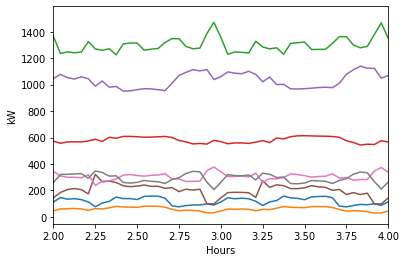

In [12]:
import matplotlib.pyplot as plt
loads = pd.read_csv('loads.csv')
xax = np.arange(700)/24
for x in range(1,9):
    plt.plot(xax, loads[f'{x}_est'].iloc[:700])
    
plt.xlabel('Hours')
plt.ylabel('kW')
plt.xlim(2,4)

In [ ]:
len(loads['1_est'])

In [ ]:
solar = pd.read_csv('coors_pv.csv')

In [ ]:
solar['Date & Time'] = pd.to_datetime(solar['Date & Time'], format='%m/%d/%Y %H:%M')

In [ ]:
(solar['Date & Time'].dt.hour).idxmin()